# Configure environment and load data

In [35]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Enable LaTeX text rendering
plt.rcParams['text.usetex'] = True

# Load data
metrics = pd.read_csv('/Users/mjaskir/ngg/classes/qnc/presentation/metrics_merged.csv')
demo = pd.read_csv('/Users/mjaskir/ngg/rotations/satterthwaite/tracts/data/cohort_files/InferiorFrontoOccipitalFasciculusL_cohort_file.csv') # Contains age data for cohort

# Clean up demo dataset
demo = demo[demo['scalar_name'] != 'bin']
demo = demo.drop(['scalar_name', 'source_file'], axis=1)

# Merge demo with metrics, keeping only values of sub in the metrics dataframe
metrics_demo =  metrics.merge(demo, on='sub', how='left')

# Sort metrics_demo by age
metrics_demo = metrics_demo.sort_values(by='age')

# Convert age to years
metrics_demo['age'] = metrics_demo['age']/12


# Plot surface area vs. age for occipital endpoint of left IFOF

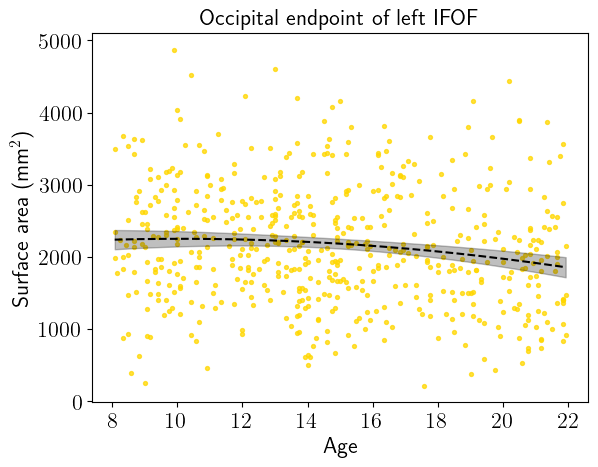

In [36]:
# Plot scatter plot
plt.scatter(metrics_demo['age'], metrics_demo['area_of_end_region_1_mm2_InferiorFrontoOccipitalFasciculusL'], color='gold', s=8, alpha=0.75)

# Fit a quadradic trendline
z = np.polyfit(metrics_demo['age'], metrics_demo['area_of_end_region_1_mm2_InferiorFrontoOccipitalFasciculusL'], 2)
p = np.poly1d(z)
plt.plot(metrics_demo['age'],p(metrics_demo['age']), color='black', linestyle='--')

# Calculate standard error
y_pred = p(metrics_demo['age'])
y_true = metrics_demo['area_of_end_region_1_mm2_InferiorFrontoOccipitalFasciculusL']
y_err = y_true - y_pred
mean_x = metrics_demo['age'].mean()
n = len(metrics_demo['age'])
dof = n - 2
t = stats.t.ppf(1-0.025, df=dof)
s_err = np.sum(np.power(y_err, 2))

# Calculate confidence interval
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((metrics_demo['age']-mean_x),2)/
            ((np.sum(np.power(metrics_demo['age'],2)))-n*(np.power(mean_x,2))))))
upper = p(metrics_demo['age']) + abs(conf)
lower = p(metrics_demo['age']) - abs(conf)

# Plot confidence interval
plt.fill_between(metrics_demo['age'], lower, upper, color='black', alpha=0.25)

# Plot labels
plt.xlabel('Age', fontsize=16)
plt.ylabel('Surface area (mm$^2$)', fontsize=16)
plt.title('Occipital endpoint of left IFOF', fontsize=16)
plt.xticks(np.arange(8, 24, 2))

# Display plot
plt.show()

# Plot surface area vs. age for inferior frontal endpoint of left IFOF

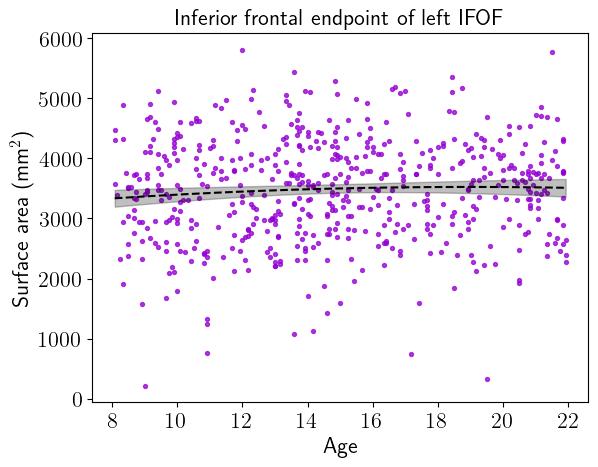

In [37]:
# Plot scatter plot
plt.scatter(metrics_demo['age'], metrics_demo['area_of_end_region_2_mm2_InferiorFrontoOccipitalFasciculusL'], color='darkviolet', s=8, alpha=0.75)

# Fit a quadradic trendline
z = np.polyfit(metrics_demo['age'], metrics_demo['area_of_end_region_2_mm2_InferiorFrontoOccipitalFasciculusL'], 2)
p = np.poly1d(z)
plt.plot(metrics_demo['age'],p(metrics_demo['age']), color='black', linestyle='--')

# Calculate standard error
y_pred = p(metrics_demo['age'])
y_true = metrics_demo['area_of_end_region_2_mm2_InferiorFrontoOccipitalFasciculusL']
y_err = y_true - y_pred
mean_x = metrics_demo['age'].mean()
n = len(metrics_demo['age'])
dof = n - 2
t = stats.t.ppf(1-0.025, df=dof)
s_err = np.sum(np.power(y_err, 2))

# Calculate confidence interval
conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((metrics_demo['age']-mean_x),2)/
            ((np.sum(np.power(metrics_demo['age'],2)))-n*(np.power(mean_x,2))))))
upper = p(metrics_demo['age']) + abs(conf)
lower = p(metrics_demo['age']) - abs(conf)

# Plot confidence interval
plt.fill_between(metrics_demo['age'], lower, upper, color='black', alpha=0.25)

# Plot labels
plt.xlabel('Age', fontsize=16)
plt.ylabel('Surface area (mm$^2$)', fontsize=16)
plt.title('Inferior frontal endpoint of left IFOF', fontsize=16)
plt.xticks(np.arange(8, 24, 2))

# Display plot
plt.show()